In [7]:
#Linear regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
np.random.seed(42)
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [4]:
model=LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f"Intercept: {model.intercept_[0]:.2f}")
print(f"Coefficient: {model.coef_[0][0]:.2f}")

Intercept: 4.14
Coefficient: 2.80


In [5]:
mse=mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.65


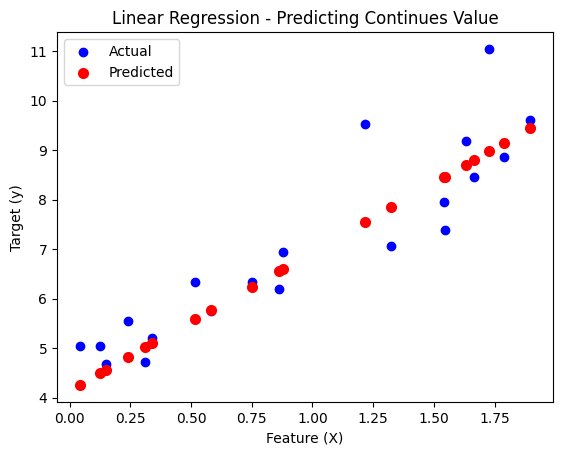

In [6]:
plt.scatter(X_test,y_test,color="blue", label="Actual")
plt.scatter(X_test,y_pred,color="red", linewidth=2,label="Predicted")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Linear Regression - Predicting Continues Value")
plt.legend()
plt.show()

In [8]:
#Logistic Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


In [12]:
!pip install scikit-learn --upgrade

In [15]:
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_repeated=0,
                            n_clusters_per_class=1,  random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_prob = model.predict_proba(X_test)[:, 1]


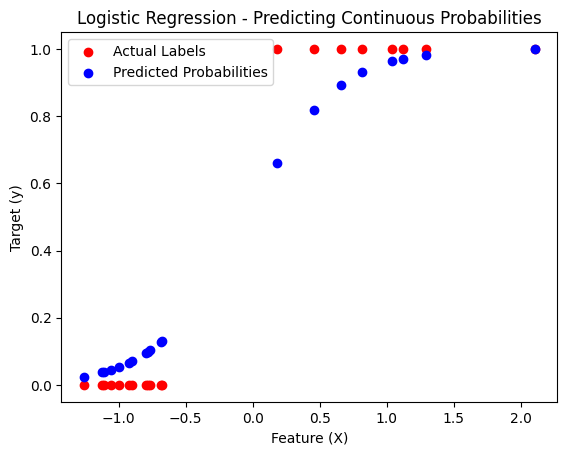

In [16]:
plt.scatter(X_test,y_test, color="red", label="Actual Labels")
plt.scatter(X_test,y_prob, color="blue", label="Predicted Probabilities")
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Logistic Regression - Predicting Continuous Probabilities")
plt.legend()
plt.show()

In [46]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn import tree
df=pd.read_csv(r"/content/Purchase_new.csv")
print(df.head())


  Holiday Discount Free Delivery Purchase
0      No      Yes           Yes      Yes
1      No      Yes           Yes      Yes
2      No       No            No       No
3     yes      Yes           Yes      Yes
4     yes      Yes           Yes      Yes


In [48]:
encoder=LabelEncoder()
for col in df.columns:
  df[col]=encoder.fit_transform(df[col])

X=df.drop(columns=["Purchase"])
y=df["Purchase"]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=42)
model.fit(X_train,y_train)



DecisionTreeClassifier(max_depth=3, random_state=42)

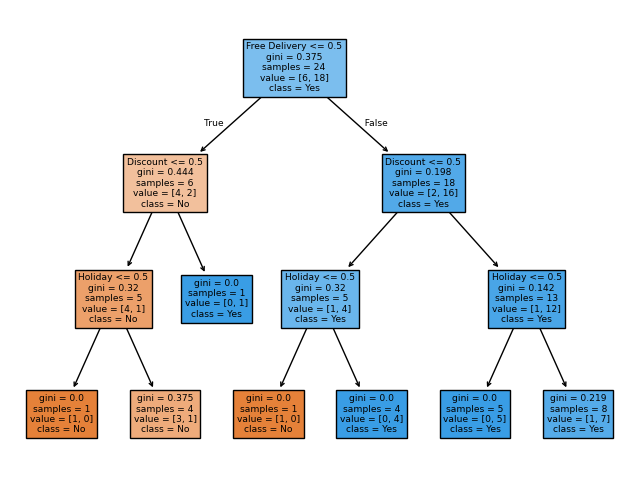

Model Accuracy: 100.00%
Prediction (0 = NO, 1 = Yes): 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
tree.plot_tree(model,feature_names=X.columns,class_names=["No","Yes"], filled=True)
plt.show()
accuracy=model.score(X_test,y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
sample=[[1, 1, 1]]
prediction=model.predict(sample)
print(f"Prediction (0 = NO, 1 = Yes): {prediction[0]}")